In [1]:
# pip install opencv-python

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of practicals

**Real Time Face Detection using Video or Image**

In [3]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture(0)
#video_capture = cv2.VideoCapture('/path/video.mp4') # For vid files

def face_detection(video):
    gray = cv2.cvtColor(video,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,scaleFactor = 1.1,minNeighbors = 5,minSize = (40,40))
    
    for (x,y,w,h) in faces:
        cv2.rectangle(video,pt1 = (x,y),pt2 = (x+w,y+h),color = (0,255,0),thickness = 2)
    return faces

while True:
    result,video_frame = video_capture.read()
    my_face = face_detection(video_frame)
    cv2.imshow('Face Detection Window (Press X to exit)',video_frame)
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
video_capture.release()
cv2.destroyAllWindows()

**Read and write images and printing their dimensions**

In [4]:
img = cv2.imread('puppy.jpg')
cv2.imwrite('output.jpg',img)
op = cv2.imread('output.jpg')

(-0.5, 331.5, 299.5, -0.5)

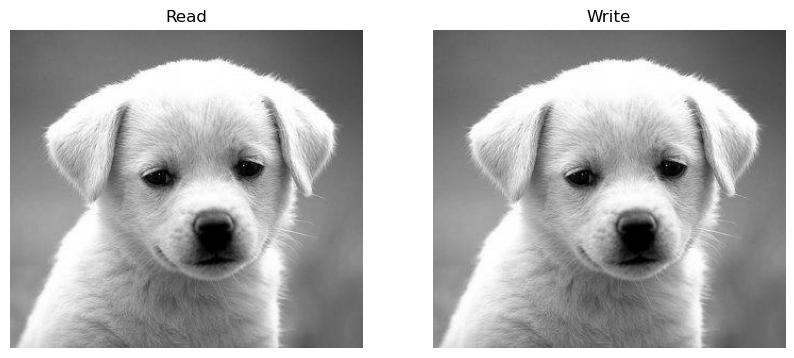

In [5]:
# Read ip
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Read')
plt.axis('off')
# Read op
plt.subplot(1,2,2)
plt.imshow(op)
plt.title('Write')
plt.axis('off')

(-0.5, 1199.5, 1599.5, -0.5)

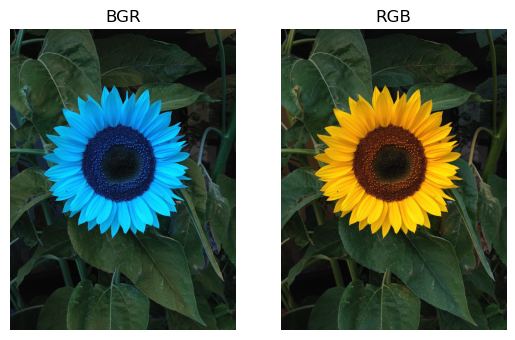

In [6]:
sun = cv2.imread('sun.jpg')
sun_rgb = cv2.cvtColor(sun,cv2.COLOR_BGR2RGB)
# OG in bgr
plt.subplot(1,2,1)
plt.imshow(sun)
plt.title('BGR')
plt.axis('off')
# RGB converted
plt.subplot(1,2,2)
plt.imshow(sun_rgb)
plt.title('RGB')
plt.axis('off')

**Printing Dimensions and Size**

In [7]:
print('Image shape:',img.shape)
print('Image size:',img.size)
print('Image data str:',img.dtype)

Image shape: (300, 332, 3)
Image size: 298800
Image data str: uint8


**Copying and Resizing**

Old shape (300, 332, 3) and New shape (100, 100, 3)


(-0.5, 99.5, 99.5, -0.5)

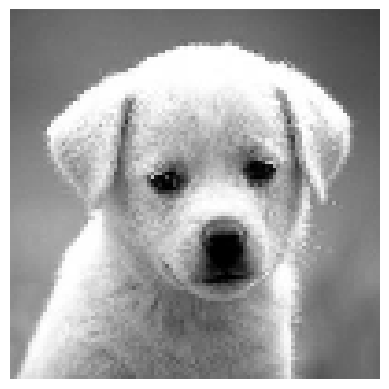

In [8]:
resized_img = cv2.resize(img,(100,100))
print(f"Old shape {img.shape} and New shape {resized_img.shape}")
plt.imshow(resized_img)
plt.axis('off')

(-0.5, 331.5, 299.5, -0.5)

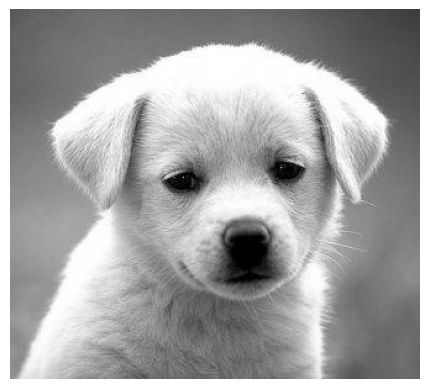

In [9]:
copy_image = img.copy()
plt.imshow(copy_image)
plt.axis('off')

**Geometric Operations**

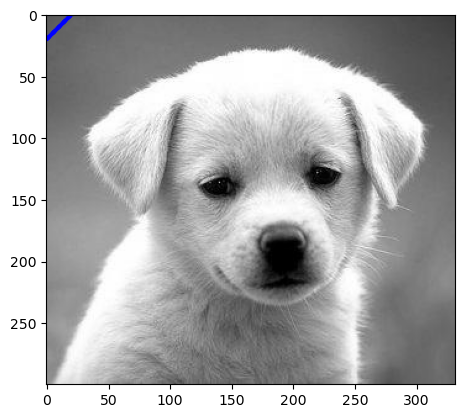

In [12]:
cv2.line(img,pt1 = (0,20),pt2 = (20,0),color = (0,0,255),thickness = 2)
plt.imshow(img)

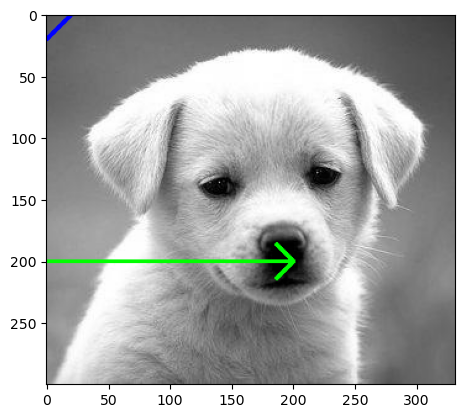

In [14]:
cv2.arrowedLine(img,pt1 = (0,200),pt2 = (200,200),color = (0,255,0),thickness = 2)
plt.imshow(img)

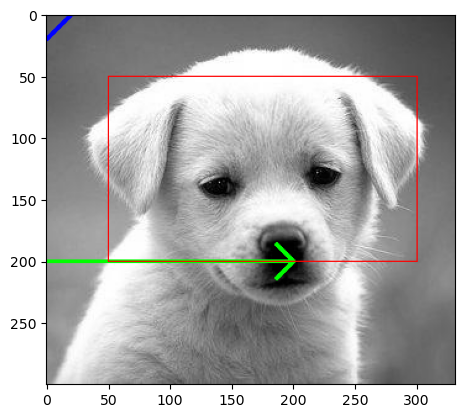

In [15]:
cv2.rectangle(img,pt1 = (50,50),pt2 = (300,200),color = (255,0,0),thickness = 1)
plt.imshow(img)

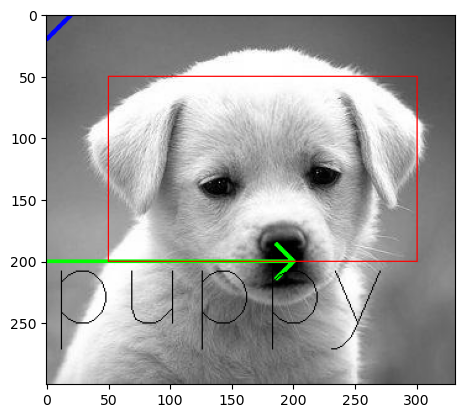

In [20]:
cv2.putText(img,text = 'puppy',org = (0,250),fontFace = cv2.FONT_HERSHEY_SIMPLEX,fontScale = 3,color = (0,0,0),thickness = 1)
plt.imshow(img)

**Image enhancement techniques(Negative,Contrast and Brightness adjustment) and Split-Merge**

In [37]:
sun_neg = cv2.bitwise_not(sun_rgb)
sun_adj = cv2.convertScaleAbs(sun_rgb,alpha = 1.5,beta = 50) # alpha => contrast, beta => brightness

(-0.5, 1199.5, 1599.5, -0.5)

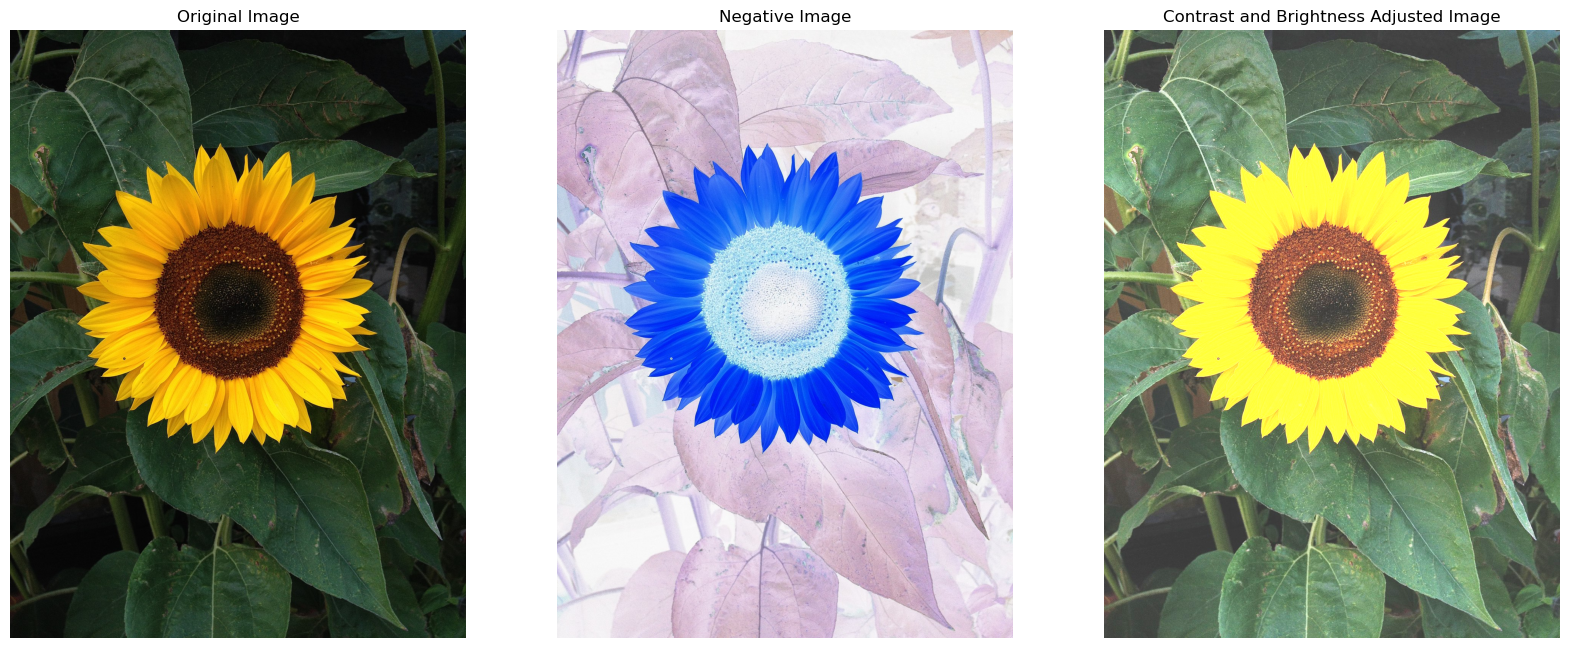

In [38]:
plt.figure(figsize = (20,50))
plt.subplot(1,3,1)
plt.imshow(sun_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sun_neg)
plt.title('Negative Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sun_adj)
plt.title('Contrast and Brightness Adjusted Image')
plt.axis('off')

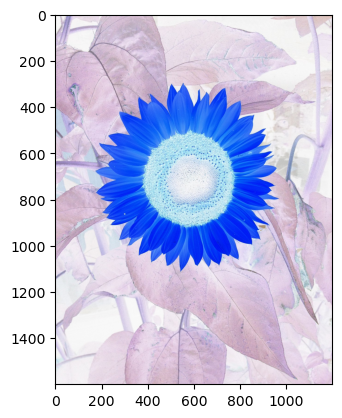

In [41]:
b,g,r = cv2.split(sun)
nb = 255 - b
ng = 255 - g
nr = 255 - r
new_sun_neg = cv2.merge((nb,ng,nr))
plt.imshow(cv2.cvtColor(new_sun_neg,cv2.COLOR_BGR2RGB))

**Lossy and Lossless**

In [43]:
import os

In [44]:
cv2.imwrite('lossless_sun.png',sun)
lossless_sun = cv2.imread('lossless_sun.png')

In [47]:
cv2.imwrite('lossy_sun.jpg',sun,[cv2.IMWRITE_JPEG_QUALITY,50])
lossy_sun = cv2.imread('lossy_sun.jpg')

Text(0.5, 1.0, 'Lossy Image \n Size = 186.115234375 kb')

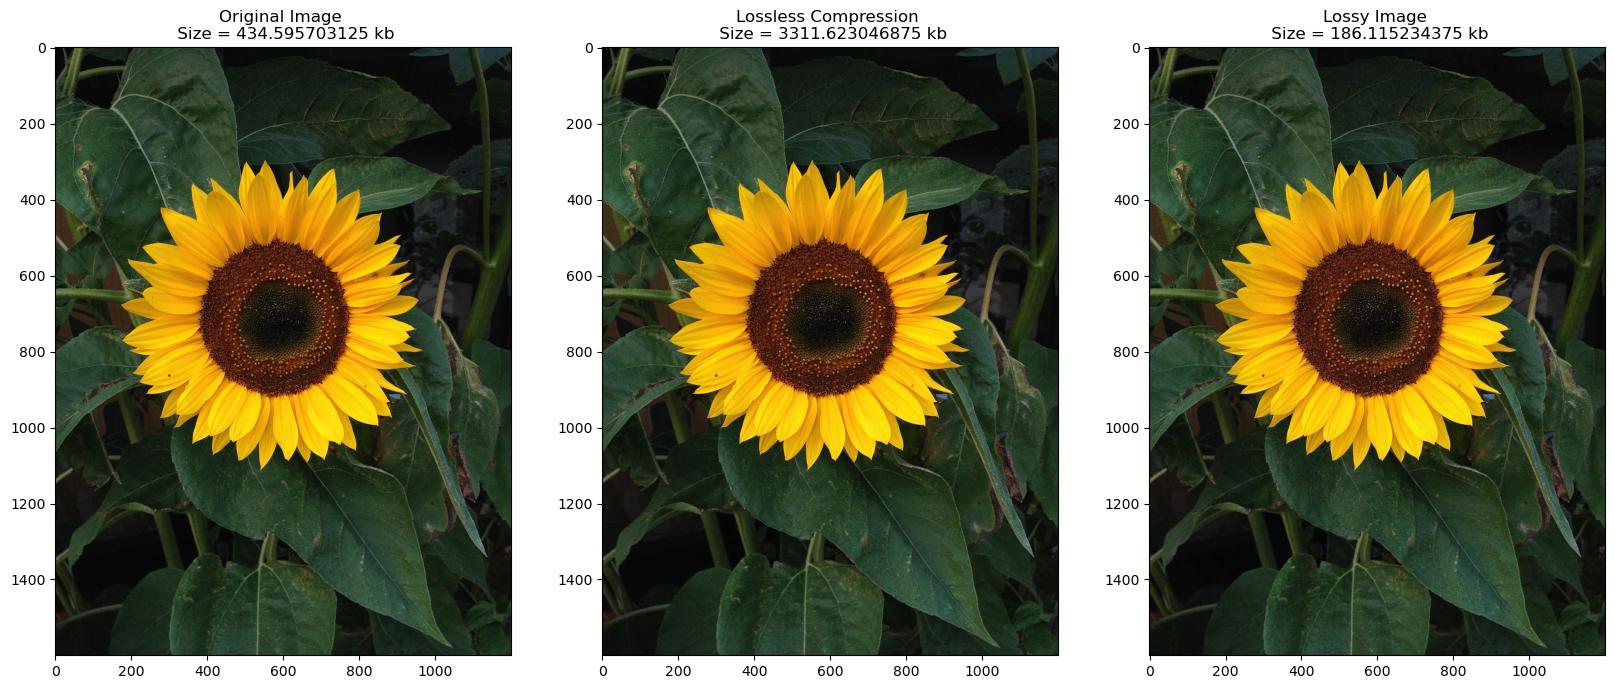

In [60]:
plt.figure(figsize = (20,50))
plt.subplot(1,3,1)
og_size = os.path.getsize('sun.jpg')
plt.imshow(cv2.cvtColor(sun,cv2.COLOR_BGR2RGB))
plt.title(f"Original Image \n Size = {(og_size)/1024} kb")

plt.subplot(1,3,2)
lossless_size = os.path.getsize('lossless_sun.png')
plt.imshow(cv2.cvtColor(lossless_sun,cv2.COLOR_BGR2RGB))
plt.title(f"Lossless Compression \n Size = {(lossless_size)/1024} kb")

plt.subplot(1,3,3)
lossy_size = os.path.getsize('lossy_sun.jpg')
plt.imshow(cv2.cvtColor(lossy_sun,cv2.COLOR_BGR2RGB))
plt.title(f"Lossy Image \n Size = {(lossy_size)/1024} kb")

**Canny Edge Detection and DCT**

(-0.5, 1199.5, 1599.5, -0.5)

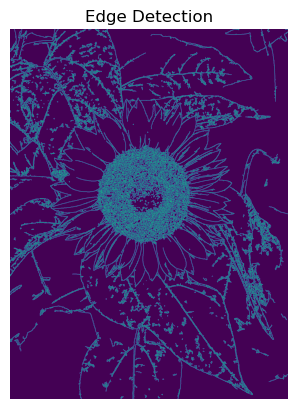

In [71]:
edges = cv2.Canny(sun,threshold1 = 50, threshold2 = 200)
plt.imshow(edges)
plt.title('Edge Detection')
plt.axis('off')

(-0.5, 1199.5, 1599.5, -0.5)

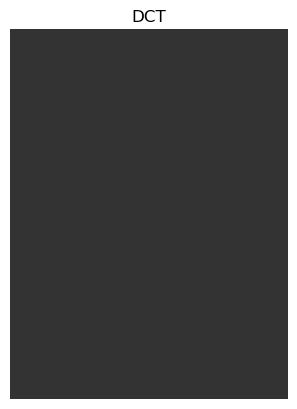

In [80]:
float_gray_sun = np.float32(cv2.cvtColor(sun,cv2.COLOR_RGB2GRAY))
dct_sun = cv2.dct(float_gray_sun)
plt.imshow(dct_sun,cmap = 'gray')
plt.title('DCT')
plt.axis('off')